# Attrition Analysis Project Solution

## Step 1) Launching

In [30]:
import pandas as pd
import numpy as np
from scipy.stats import norm, t
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('E:\Riyaz\LetsUpgrade-AI-ML\Code\general_data.csv')
df = df.drop_duplicates() 
df.dropna(inplace = True)

In [32]:
# mapping data
df.Attrition = df.Attrition.map({'Yes' : 1, 'No' : 0})
df.Gender = df.Gender.map({'Male' : 1, 'Female' : 0})

In [33]:
# check colums with identical value and we drop it

df.drop(['EmployeeID'], axis=1, inplace=True)

for i in df:
    if df[i].nunique() == 1:
        df.drop([i], axis=1, inplace=True)

In [34]:
dfattrition = df[df.Attrition == 1].reset_index(drop=True).copy()

In [35]:
dfattrition.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,0,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4
1,28,1,Travel_Rarely,Research & Development,11,2,Medical,1,2,Sales Executive,Single,58130,2.0,20,1,5.0,2,0,0,0
2,47,1,Non-Travel,Research & Development,1,1,Medical,1,1,Research Scientist,Married,57620,1.0,11,2,10.0,4,10,9,9
3,44,1,Travel_Frequently,Research & Development,1,2,Medical,1,2,Research Scientist,Divorced,103330,3.0,14,1,19.0,2,1,0,0
4,26,1,Travel_Rarely,Research & Development,4,3,Medical,1,3,Research Scientist,Divorced,68540,2.0,11,0,5.0,5,3,0,2


## Step 2) Univariate Analysis

In [36]:
describe = df.describe()
describe

,Age,Attrition,DistanceFromHome,Education,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000
mean,36.933364,0.160885,9.198996,2.912369,0.599270,2.063898,65061.702419,2.693291,15.210634,0.794614,11.290278,2.798266,7.010497,2.191693,4.126198
std,9.137272,0.367467,8.105396,1.024728,0.490102,1.106115,47142.310175,2.497832,3.663007,0.852397,7.785717,1.289402,6.129351,3.224994,3.569674
min,18.000000,0.000000,1.000000,1.000000,0.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,2.000000,2.000000,0.000000,1.000000,29110.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,0.000000,7.000000,3.000000,1.000000,2.000000,49190.000000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,0.000000,14.000000,4.000000,1.000000,3.000000,83790.000000,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,1.000000,29.000000,5.000000,1.000000,5.000000,199990.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [37]:
skew = pd.DataFrame(df.skew(), columns=['skew']).T
skew

,Age,Attrition,DistanceFromHome,Education,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
skew,0.413048,1.846529,0.955517,-0.288977,-0.405283,1.021797,1.367457,1.029174,0.81951,0.967263,1.115419,0.551818,1.764619,1.980992,0.834277


In [38]:
variance = pd.DataFrame(df.var(), columns=['variance']).T
variance

,Age,Attrition,DistanceFromHome,Education,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
variance,83.489738,0.135032,65.697438,1.050068,0.2402,1.22349,2.222397e+09,6.239165,13.417618,0.726581,60.617385,1.662558,37.568938,10.400588,12.742573


In [39]:
kurt = pd.DataFrame(df.kurt(), columns=['kurt']).T
kurt

,Age,Attrition,DistanceFromHome,Education,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
kurt,-0.409517,1.410313,-0.230691,-0.565008,-1.836584,0.388189,0.990836,0.014307,-0.306951,0.356755,0.909316,0.494215,3.930726,3.592162,0.170703


In [40]:
mode = df.mode().loc[:, list(describe.columns)]
mode.rename(index={0: 'mode'}, inplace=True)

join_all = pd.concat([describe, mode, skew, variance, kurt])
join_all

,Age,Attrition,DistanceFromHome,Education,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4.382000e+03,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000
mean,36.933364,0.160885,9.198996,2.912369,0.599270,2.063898,6.506170e+04,2.693291,15.210634,0.794614,11.290278,2.798266,7.010497,2.191693,4.126198
std,9.137272,0.367467,8.105396,1.024728,0.490102,1.106115,4.714231e+04,2.497832,3.663007,0.852397,7.785717,1.289402,6.129351,3.224994,3.569674
min,18.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.009000e+04,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,2.000000,2.000000,0.000000,1.000000,2.911000e+04,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,0.000000,7.000000,3.000000,1.000000,2.000000,4.919000e+04,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,0.000000,14.000000,4.000000,1.000000,3.000000,8.379000e+04,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,1.000000,29.000000,5.000000,1.000000,5.000000,1.999900e+05,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000
mode,35.000000,0.000000,2.000000,3.000000,1.000000,1.000000,2.342000e+04,1.000000,11.000000,0.000000,10.000000,2.000000,5.000000,0.000000,2.000000
skew,0.413048,1.846529,0.955517,-0.288977,-0.405283,1.021797,1.367457e+00,1.029174,0.819510,0.967263,1.115419,0.551818,1.764619,1.980992,0.834277


From table above, we can conclude that :<br>
1. All the features have positive skewness (since mean > median), except Education has negative skewness,
   but age seems like normal dist since the difference between mean and median is not too far.
   
2. Age, Distance from home, education, percentsalaryhike have minus Kurt so it has Platykurtic, NumComWorked near to zero so it can Mesokuartic, and the other feature have Laptokuartic.


## Step 3) Checking the Outliers

Age


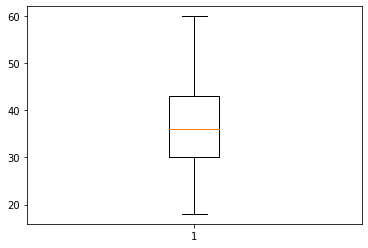

Attrition


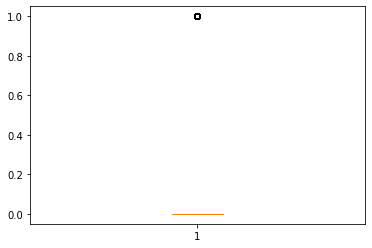

DistanceFromHome


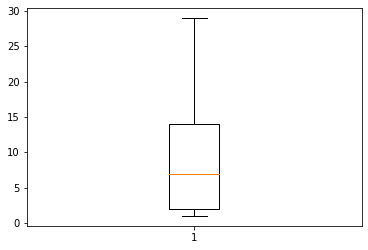

Education


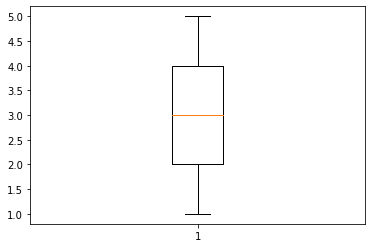

Gender


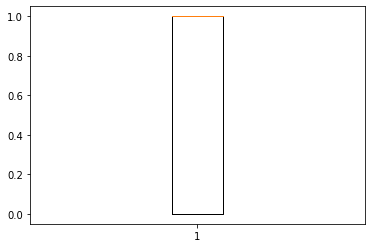

JobLevel


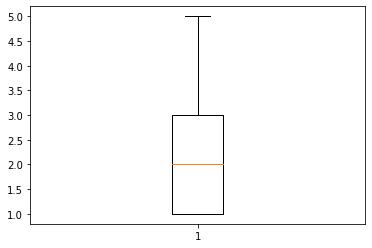

MonthlyIncome


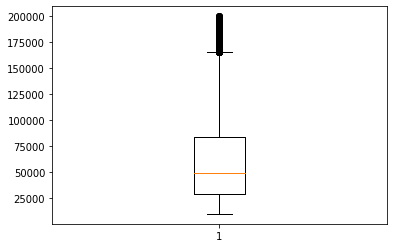

NumCompaniesWorked


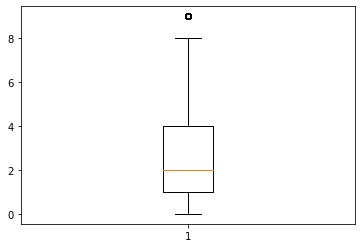

PercentSalaryHike


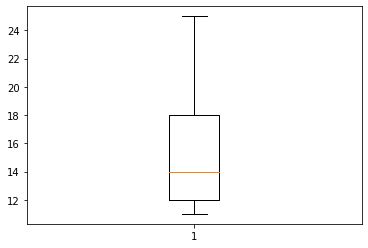

StockOptionLevel


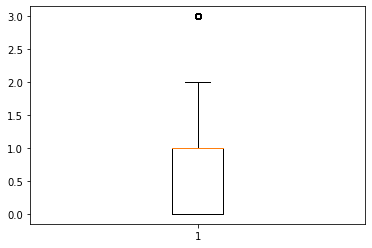

TotalWorkingYears


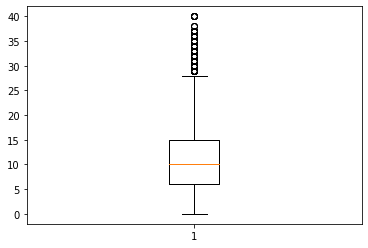

TrainingTimesLastYear


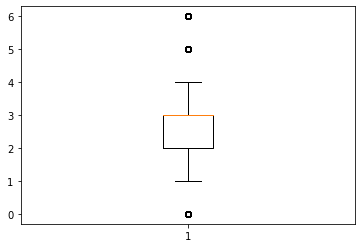

YearsAtCompany


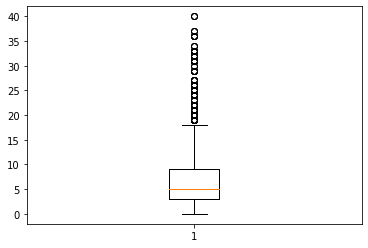

YearsSinceLastPromotion


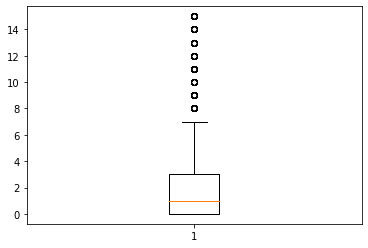

YearsWithCurrManager


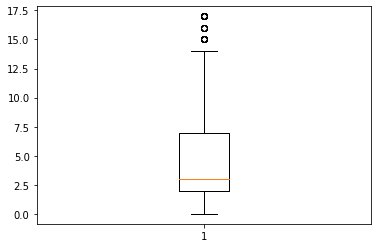

In [41]:
for col in df.columns:
    dtype = df[col].dtypes
    if dtype != 'object':
        print(col)
        plt.boxplot(df[col])
        plt.show()

From graph boxplot above, we can conclude that : <br>
1. Features those have many outliers within are :<br>
   - YearsWithCurrManager
   - YearsSinceLastPromotion
   - YearsAtCompany
   - TrainingTimesLastYear
   - TotalWorkingYears

## Step 4) Data Visualization

In [42]:
def bar_chart(feature):
    stay = df[df['Attrition']==0][feature].value_counts()
    leave = df[df['Attrition']==1][feature].value_counts()
    plotting = pd.DataFrame([stay,leave])
    plotting.index = ['Stay','Leave']
    plotting.plot(kind='bar',stacked=True, figsize=(10,5), title= feature)

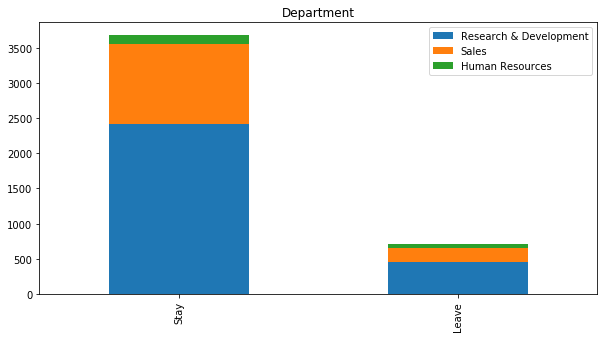

In [43]:
bar_chart('Department')

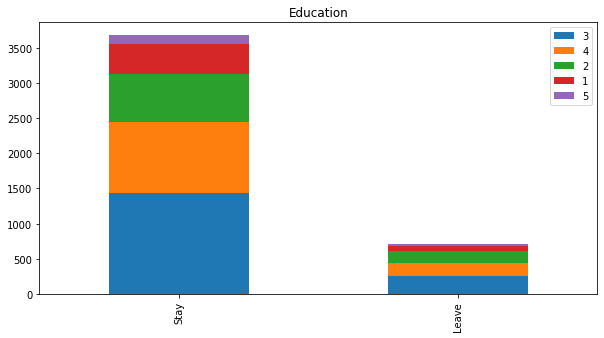

In [44]:
bar_chart('Education')

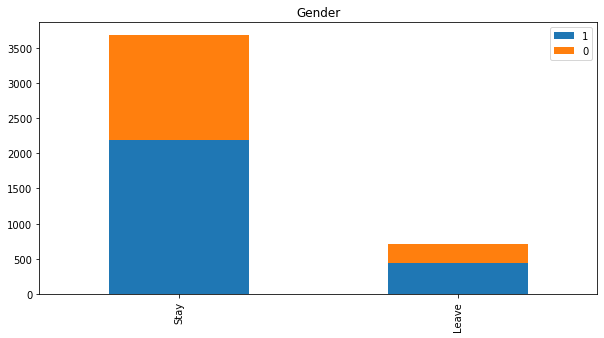

In [45]:
bar_chart('Gender')

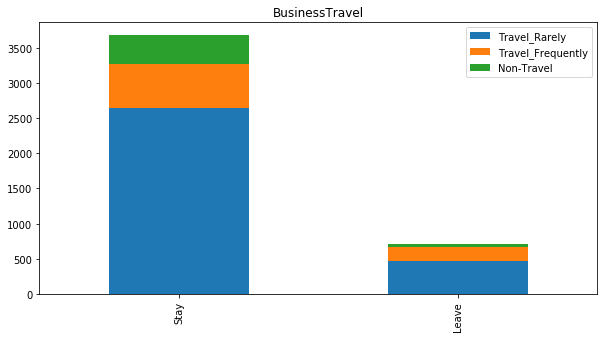

In [46]:
bar_chart('BusinessTravel')

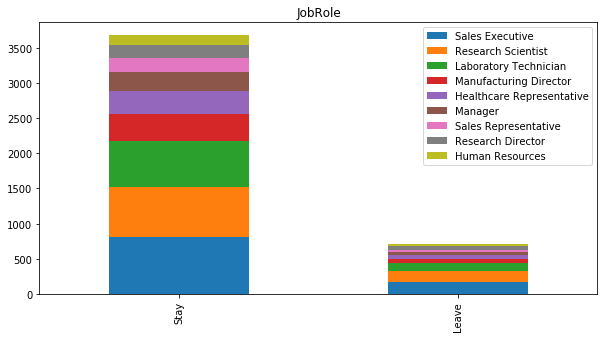

In [47]:
bar_chart('JobRole')

### if we want to focus on leaving employee visualization

In [48]:
# Make a function to help plotting
def attrition_plot(column):
    dtype = dfattrition[column].dtypes
    plt.figure()
    if dtype == 'object':
        x = dfattrition[column].value_counts().index
        y = dfattrition[column].value_counts()
        sns.barplot(x,  y).set_xticklabels(x, rotation=90)
        plt.show()
    else:
        sns.distplot(dfattrition[column], bins =10)
        plt.show()

#### We can check for item in each features that has highest value of the leaving employee

Age , mode : 31 with 54 Values


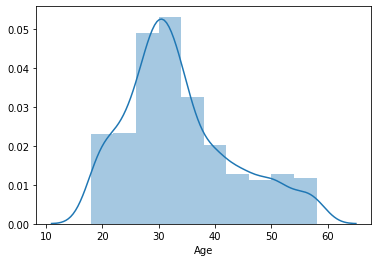

BusinessTravel , mode : Travel_Rarely with 465 Values


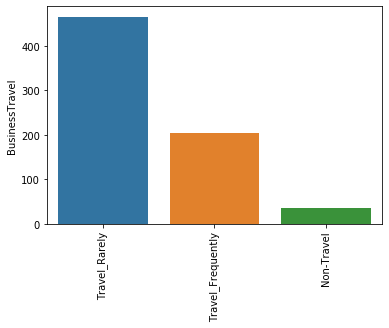

Department , mode : Research & Development with 449 Values


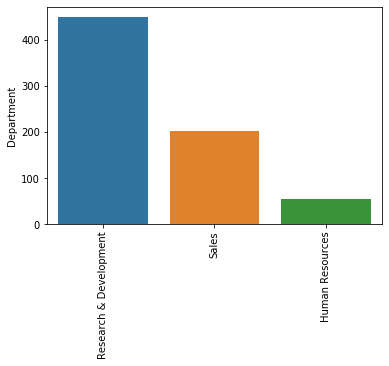

DistanceFromHome , mode : 2 with 114 Values


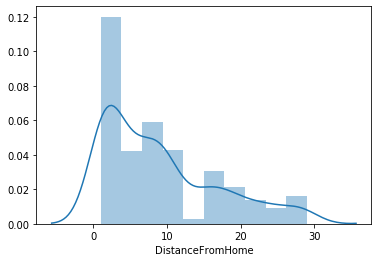

Education , mode : 3 with 263 Values


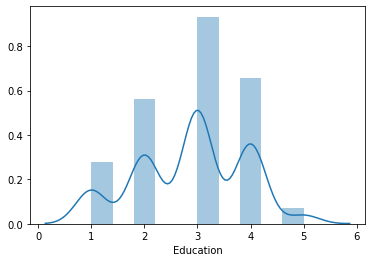

EducationField , mode : Life Sciences with 301 Values


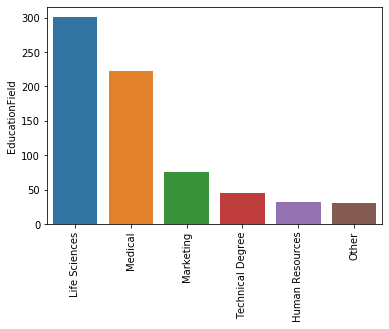

Gender , mode : 1 with 437 Values


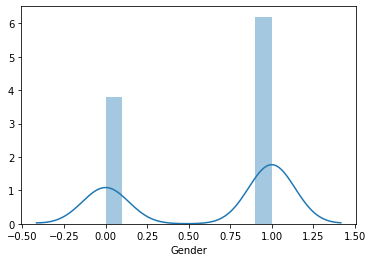

JobLevel , mode : 2 with 283 Values


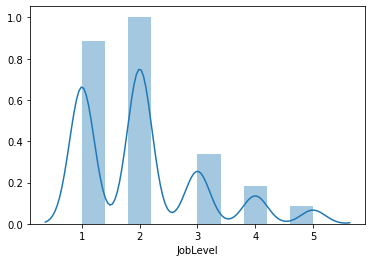

JobRole , mode : Sales Executive with 165 Values


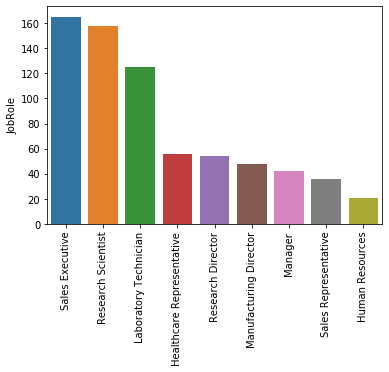

MaritalStatus , mode : Single with 356 Values


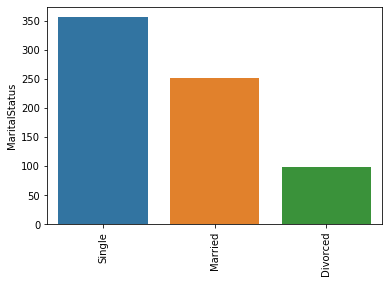

MonthlyIncome , mode : 25590 with 6 Values


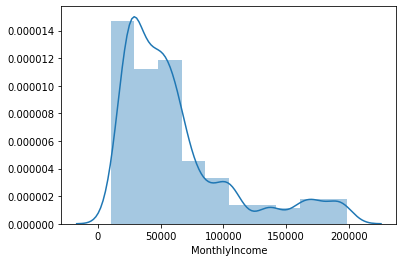

NumCompaniesWorked , mode : 1.0 with 292 Values


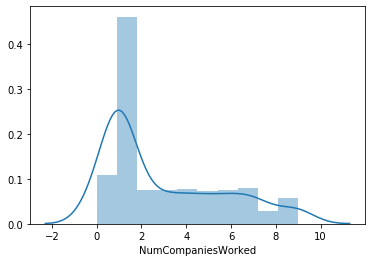

PercentSalaryHike , mode : 13 with 100 Values


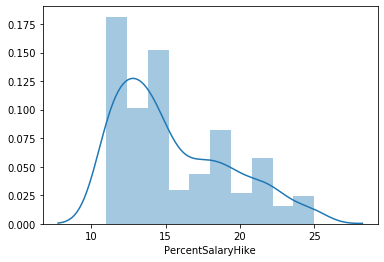

StockOptionLevel , mode : 0 with 316 Values


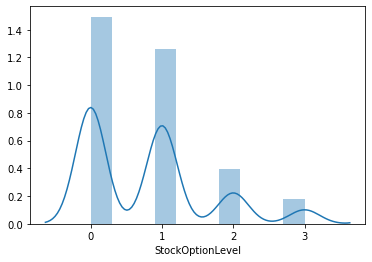

TotalWorkingYears , mode : 1.0 with 119 Values


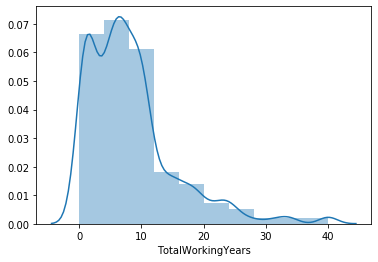

TrainingTimesLastYear , mode : 2 with 278 Values


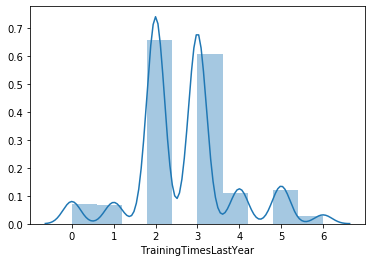

YearsAtCompany , mode : 1 with 176 Values


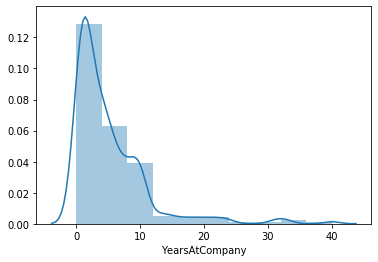

YearsSinceLastPromotion , mode : 0 with 325 Values


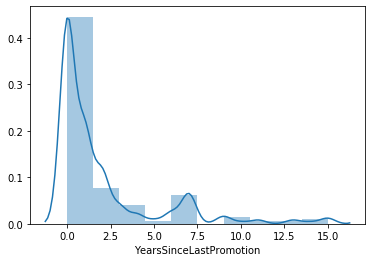

YearsWithCurrManager , mode : 0 with 252 Values


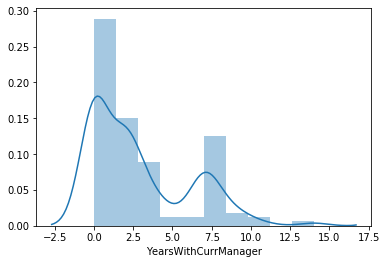

In [49]:
for i in dfattrition.columns:
    if i != 'Attrition':
        qty = dfattrition[i].value_counts().values[0]
        item = dfattrition[i].value_counts().index[0]
        print(i, f', mode : {item} with {qty} Values')
        attrition_plot(i)

## Step 5) Check Correlation between Attrition and other features

In [50]:
correlation = df.corr().Attrition.sort_values( ascending= False)
correlation2 = pd.DataFrame(correlation)
correlation2.drop(['Attrition'], axis= 0, inplace= True)

correlation2

,Attrition
NumCompaniesWorked,0.042831
PercentSalaryHike,0.033153
Gender,0.018396
StockOptionLevel,-0.008164
DistanceFromHome,-0.009449
JobLevel,-0.012382
Education,-0.017106
MonthlyIncome,-0.030160
YearsSinceLastPromotion,-0.031423
TrainingTimesLastYear,-0.047586


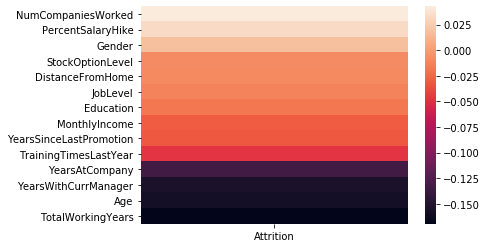

In [51]:
sns.heatmap(correlation2, vmax=correlation2.max(), vmin=correlation2.min())
plt.show()

## In the correlation table : <br>
We can conclude that <br>
NumCompaniesWorked, PercentSalaryHike , Gender	
have <b>Possitive Correlation with Attrition</b>
and <b>other variables have Negative Correlation</b>

## Step 6) Non Parametric Tests

In [52]:
from scipy.stats import chi2_contingency

'H0 - There is no dependency between Attrition and Age (REJECTED)'
'H1 - There is dependency between Attrition and Age'

chitable = pd.crosstab(df.Attrition, df.Age)

stats1, p1, dof1, expected1 = chi2_contingency(chitable)
print(stats1, p1)


if p1 < 0.05 :
    print("We reject the Ho")
else:
    print("We Accept the Ho")
# in the result below we can say that we reject the Ho due to p < 0.05

352.3011830696416 1.20869585240706e-50
We reject the Ho


In [53]:
'H0 - There is no dependency between Attrition and Gender (ACCEPTED)'
'H1 - There is dependency between Attrition and Gender'

chitable2 = pd.crosstab(df.Attrition, df.Gender)

stats2, p2, dof2, expected2 = chi2_contingency(chitable2)
print(stats2, p2)

if p2 < 0.05 :
    print("We reject the Ho")
else:
    print("We Accept the Ho")
# in the result below we can say that we accept the Ho due to p > 0.05

1.3825823839528295 0.23966176275638887
We Accept the Ho


In [54]:
'H0 - There is no dependency between Attrition and JobLevel  (ACCEPTED)'
'H1 - There is dependency between Attrition and JobLevel'

chitable3 = pd.crosstab(df.Attrition, df.JobLevel)

stats3, p3, dof3, expected3 = chi2_contingency(chitable3)
print(stats3, p3)

if p3 < 0.05 :
    print("We reject the Ho")
else:
    print("We Accept the Ho")
# in the result below we can say that we accept the Ho due to p > 0.05

7.036480574687178 0.13397290697032432
We Accept the Ho


In [55]:
'H0 - There is no dependency between Attrition and Education (ACCEPTED)'
'H1 - There is dependency between Attrition and Education'

chitable4 = pd.crosstab(df.Attrition, df.Education)

stats4, p4, dof4, expected4 = chi2_contingency(chitable4)
print(stats4, p4)

if p4 < 0.05 :
    print("We reject the Ho")
else:
    print("We Accept the Ho")
# in the result below we can say that we accept the Ho due to p > 0.05

6.2735361781270615 0.17963050984273224
We Accept the Ho


In [56]:
'H0 - There is no dependency between Attrition and NumCompaniesWorked (REJECTED)'
'H1 - There is dependency between Attrition and NumCompaniesWorked'

chitable5 = pd.crosstab(df.Attrition, df.NumCompaniesWorked)

stats5, p5, dof5, expected5 = chi2_contingency(chitable5)
print(stats5, p5)

if p5 < 0.05 :
    print("We reject the Ho")
else:
    print("We Accept the Ho")
# in the result below we can say that we reject the Ho due to p < 0.05

75.85546138415296 1.0708854426925246e-12
We reject the Ho


In [57]:
'H0 - There is no dependency between Attrition and TotalWorkingYears (REJECTED)'
'H1 - There is dependency between Attrition and TotalWorkingYears'

chitable6 = pd.crosstab(df.Attrition, df.TotalWorkingYears)

stats6, p6, dof6, expected6 = chi2_contingency(chitable6)
print(stats6, p6)

if p6 < 0.05 :
    print("We reject the Ho")
else:
    print("We Accept the Ho")
# in the result below we can say that we reject the Ho due to p < 0.05

360.55237130857233 1.1111356799847907e-53
We reject the Ho


In [58]:
'H0 - There is no dependency between Attrition and PercentSalaryHike (ACCEPTED)'
'H1 - There is dependency between Attrition and PercentSalaryHike'

chitable7 = pd.crosstab(df.Attrition, df.PercentSalaryHike)

stats7, p7, dof7, expected7 = chi2_contingency(chitable7)
print(stats7, p7)

if p7 < 0.05 :
    print("We reject the Ho")
else:
    print("We Accept the Ho")
# in the result below we can say that we acceppt the Ho due to p > 0.05

19.132665173042696 0.15994173676121282
We Accept the Ho


In [59]:
'H0 - There is no dependency between Attrition and YearsAtCompany (REJECTED)'
'H1 - There is dependency between Attrition and YearsAtCompany'

chitable = pd.crosstab(df.Attrition, df.YearsAtCompany)

stats, p, dof, expected = chi2_contingency(chitable)
print(stats, p)

if p < 0.05 :
    print("We reject the Ho")
else:
    print("We Accept the Ho")
# in the result below we can say that we Reject the Ho due to p < 0.05

284.1905063085053 2.434867576146702e-40
We reject the Ho


In [60]:
'H0 - There is no dependency between Attrition and YearsSinceLastPromotion (REJECTED)'
'H1 - There is dependency between Attrition and YearsSinceLastPromotion'

chitable = pd.crosstab(df.Attrition, df.YearsSinceLastPromotion)

stats, p, dof, expected = chi2_contingency(chitable)
print(stats, p)

if p < 0.05 :
    print("We reject the Ho")
else:
    print("We Accept the Ho")
# in the result below we can say that we reject the Ho due to p < 0.05

64.22958433145763 4.66086831785978e-08
We reject the Ho


In [61]:
'H0 - There is no dependency between Attrition and DistanceFromHome (REJECTED)'
'H1 - There is dependency between Attrition and DistanceFromHome'

chitable = pd.crosstab(df.Attrition, df.DistanceFromHome)

stats, p, dof, expected = chi2_contingency(chitable)
print(stats, p)

if p < 0.05 :
    print("We reject the Ho")
else:
    print("We Accept the Ho")
# in the result below we can say that we Reject the Ho due to p < 0.05

103.09280258300478 1.5872525392897128e-10
We reject the Ho


# Conclusion

We assume that factors those has dependency with attrition are:<br>
    1. Business Travel, we can see, many leaving employee are rarely traveling 
    2. Monthly income, those have income < $25000 are leaving the company
    3. YearSinceLastPromotion, we can see that we reject the null hypotesis, it means there is dependency between attrition and  this feature
    4. Distancefromhome, from the hypotesis test, we rejected the Null Hypothesis, it means there is a dependency between attrition and this feature and also from the visualization. Employee that has short distance likely leaves the company.